In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import missingno as msno
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,customer_unique_id,mean_freight,order_count,mean_n_items,last_order,mean_payment_item,total_payment_item,mean_review,days_since_last_order
0,0000366f3b9a7992bf8c76cfdf3221e2,12.00,1,1.0,2018-05-10 10:56:27,129.90,129.90,5.0,111.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,1,1.0,2018-05-07 11:11:27,18.90,18.90,4.0,114.0
2,0000f46a3911fa3c0805444483337064,17.22,1,1.0,2017-03-10 21:05:03,69.00,69.00,3.0,537.0
3,0000f6ccb0745a6a4b88665a16c9f078,17.63,1,1.0,2017-10-12 20:29:41,25.99,25.99,4.0,321.0
4,0004aac84e0df4da2b147fca70cf8255,16.89,1,1.0,2017-11-14 19:45:42,180.00,180.00,5.0,288.0


In [5]:
data = data[['mean_freight','order_count','mean_n_items','mean_payment_item','mean_review','days_since_last_order']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93340 entries, 0 to 93339
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_freight           93340 non-null  float64
 1   order_count            93340 non-null  int64  
 2   mean_n_items           93340 non-null  float64
 3   mean_payment_item      93340 non-null  float64
 4   mean_review            92738 non-null  float64
 5   days_since_last_order  93340 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.3 MB


<AxesSubplot:>

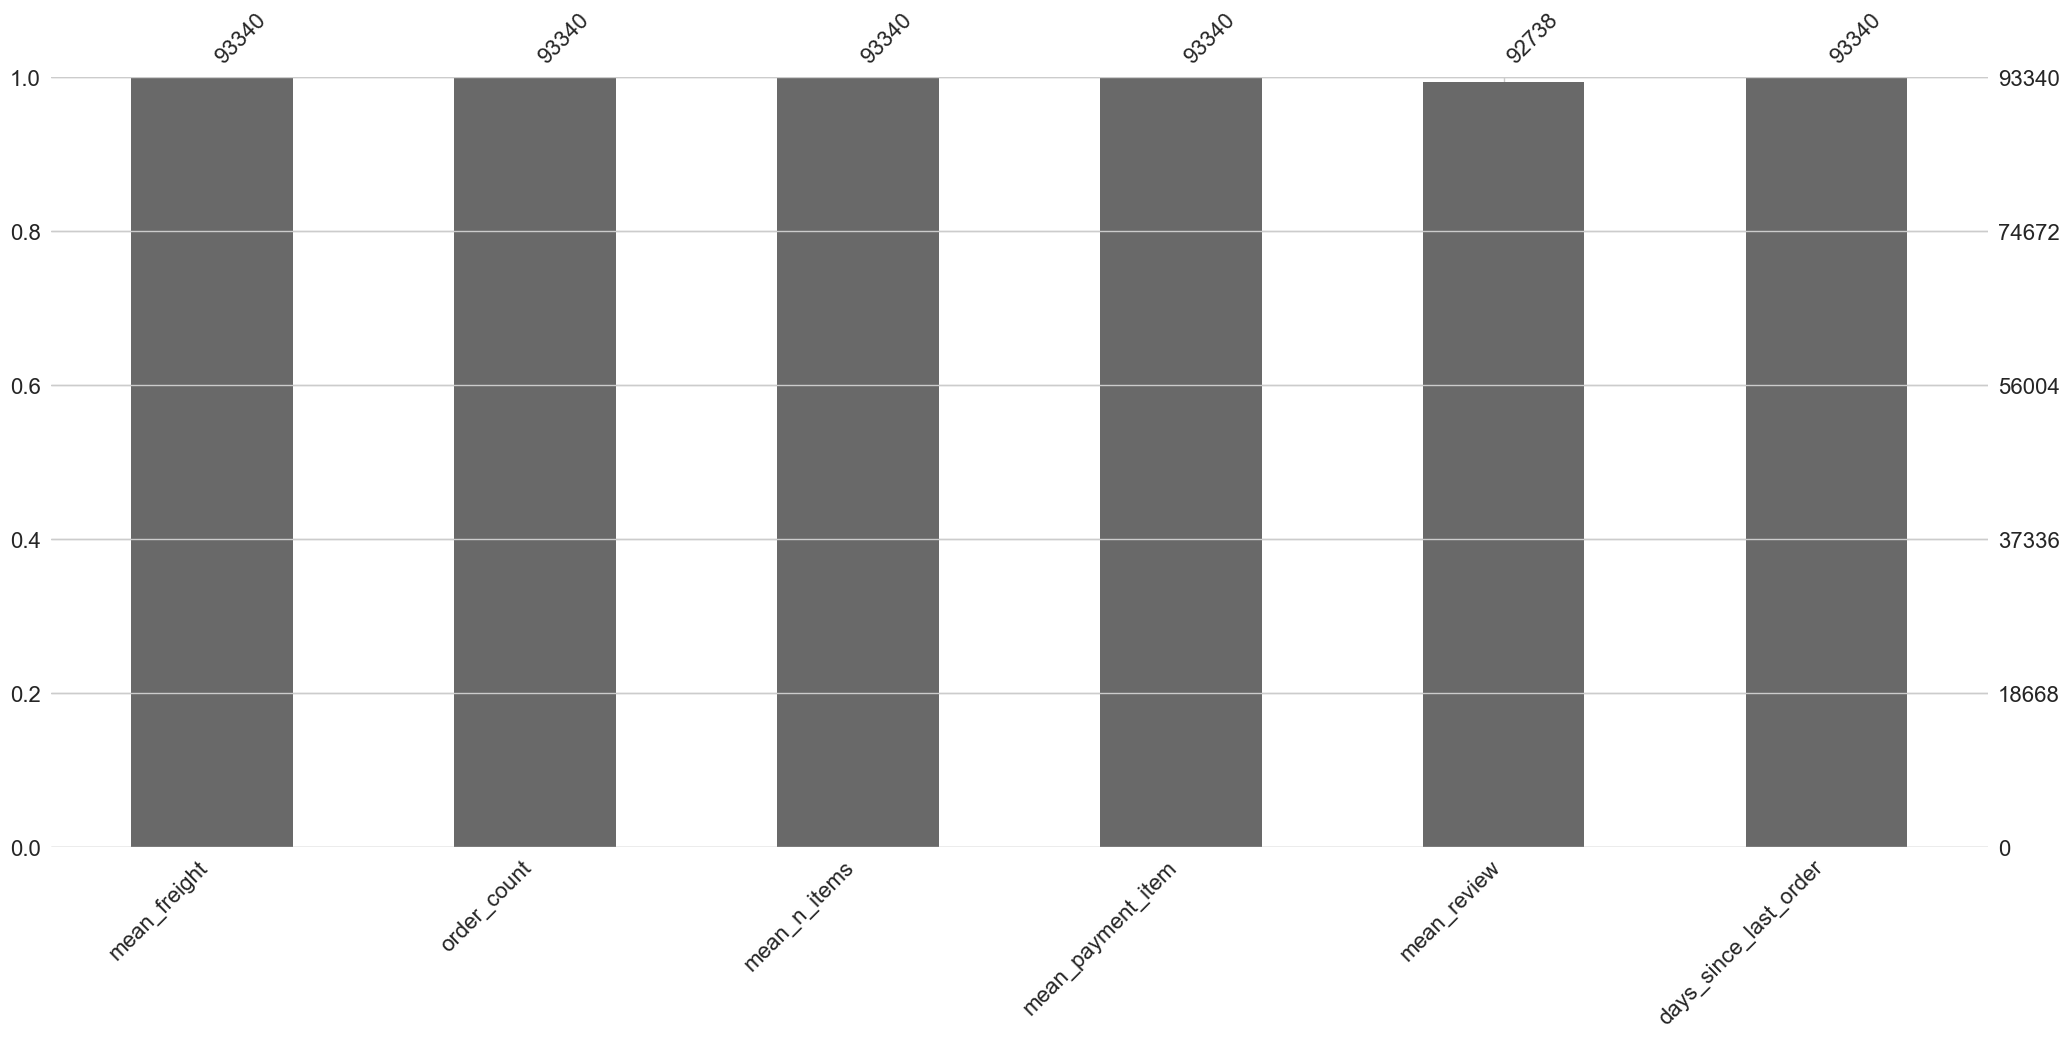

In [7]:
msno.bar(data)

In [8]:
data = data.dropna(how='any')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92738 entries, 0 to 93339
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_freight           92738 non-null  float64
 1   order_count            92738 non-null  int64  
 2   mean_n_items           92738 non-null  float64
 3   mean_payment_item      92738 non-null  float64
 4   mean_review            92738 non-null  float64
 5   days_since_last_order  92738 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 5.0 MB


# Modélisation avec uniquement variables RFM 

In [10]:
scaler = StandardScaler()

X_rfm= scaler.fit_transform(data[['mean_payment_item','order_count','days_since_last_order']])
X_rfm

array([[-0.058798  , -0.16001233, -0.8279521 ],
       [-0.57945009, -0.16001233, -0.80829199],
       [-0.34445306, -0.16001233,  1.96378292],
       ...,
       [-0.24642037, -0.16001233,  2.16693735],
       [-0.12868733, -0.16001233, -0.77552515],
       [-0.40078668, -0.16001233,  1.61645439]])

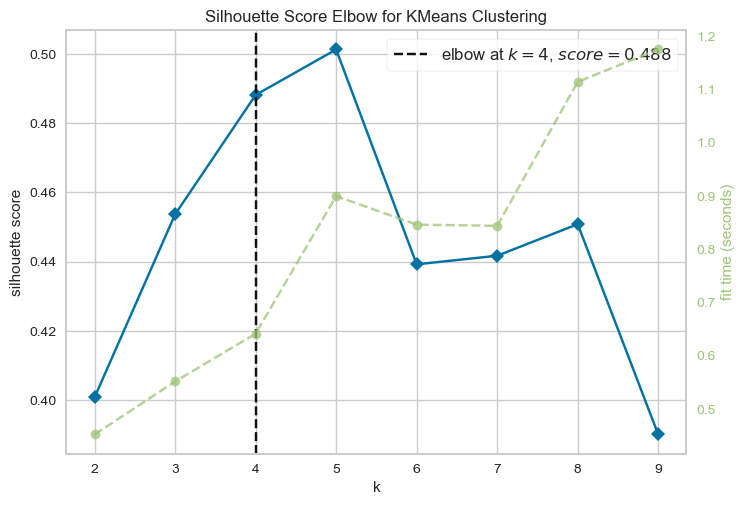

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10),metric = 'silhouette')

visualizer.fit(X_rfm)    # Fit the data to the visualizer
visualizer.poof() 

In [12]:
scaler = StandardScaler()

X_rfm= scaler.fit_transform(data[['mean_payment_item','order_count','days_since_last_order']])
X_rfm

array([[-0.058798  , -0.16001233, -0.8279521 ],
       [-0.57945009, -0.16001233, -0.80829199],
       [-0.34445306, -0.16001233,  1.96378292],
       ...,
       [-0.24642037, -0.16001233,  2.16693735],
       [-0.12868733, -0.16001233, -0.77552515],
       [-0.40078668, -0.16001233,  1.61645439]])

2 done with score 0.72938655524979
3 done with score 0.453749362488032
4 done with score 0.4881843612508351
5 done with score 0.5013349004364399
6 done with score 0.4392275767035083


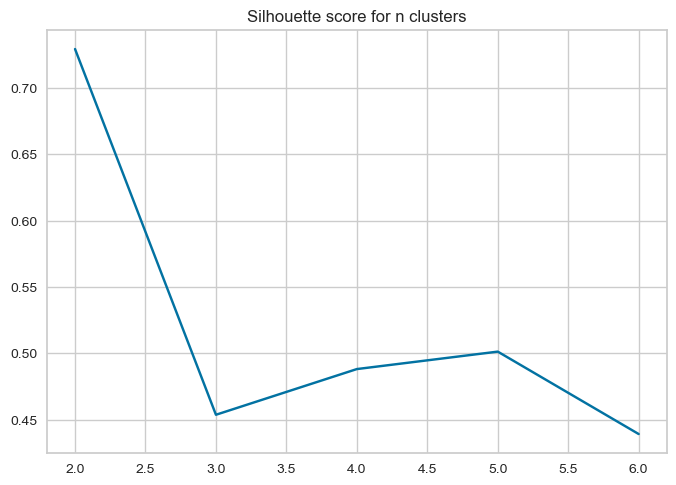

In [13]:
range_n_clusters = [2, 3, 4, 5, 6]

silhouette = list()

for n in range_n_clusters : 
    kmeans = KMeans(n_clusters=n, n_init=10).fit_predict(X_rfm)
    score = silhouette_score(X_rfm, kmeans)
    silhouette.append(score)
    print(str(n)+' done with score '+str(score))

plt.title('Silhouette score for n clusters')
plt.plot(range_n_clusters,silhouette)

1 done with inertia score 278213.99999999977
2 done with inertia score 201620.06228195963
3 done with inertia score 138090.40077767472
4 done with inertia score 87162.52202016336
5 done with inertia score 71802.19269743442
6 done with inertia score 57681.50786639286
7 done with inertia score 48342.1016939237
8 done with inertia score 42648.625350818234
9 done with inertia score 38245.556767355665


Text(0.5, 1.0, 'Inertia per n clusters')

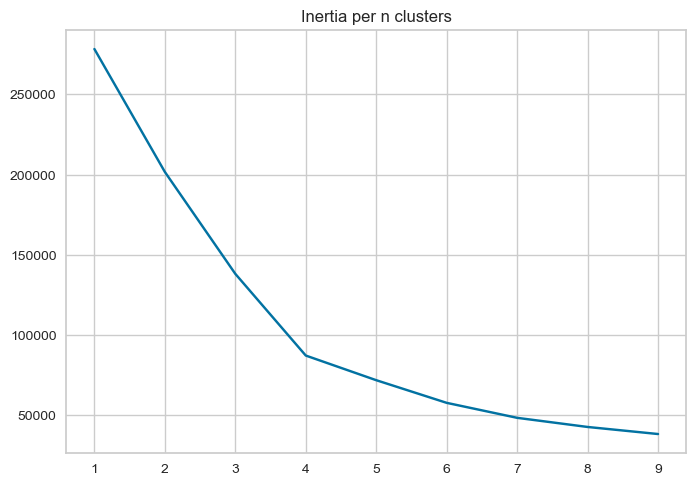

In [14]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # On entraine
    kmeans.fit(X_rfm)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)
    
    print(str(k)+' done with inertia score '+str(kmeans.inertia_))
    
plt.plot(range(1, 10),intertia_list)
plt.title('Inertia per n clusters')



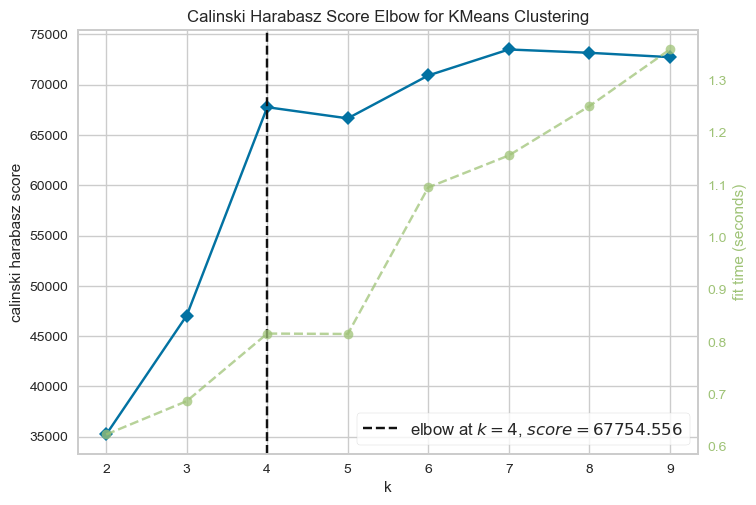

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10),metric = 'calinski_harabasz')

visualizer.fit(X_rfm)    # Fit the data to the visualizer
visualizer.poof() 

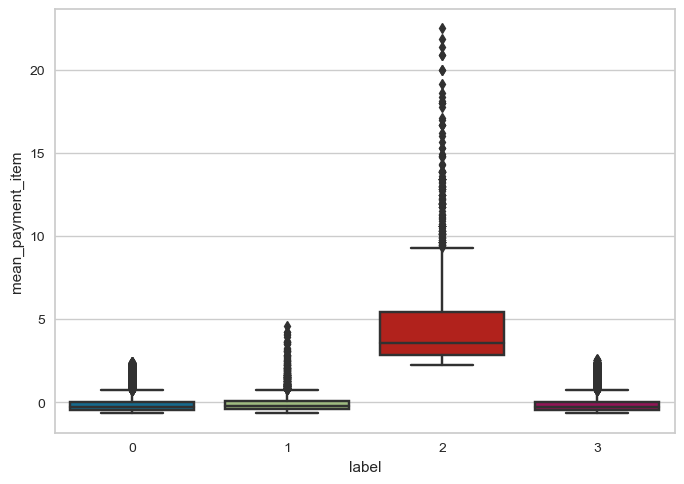

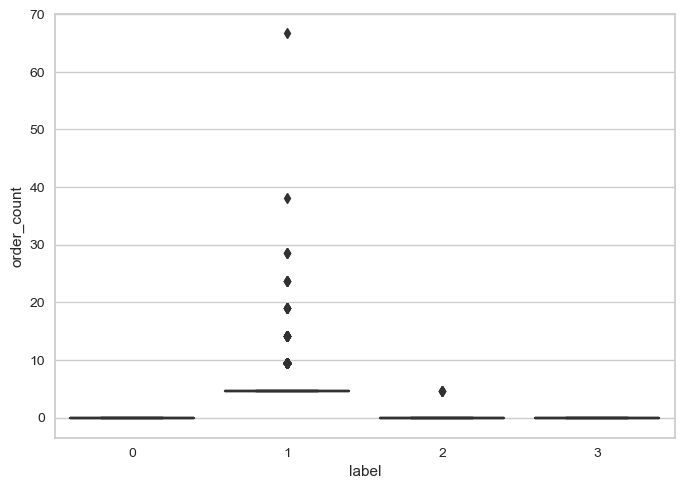

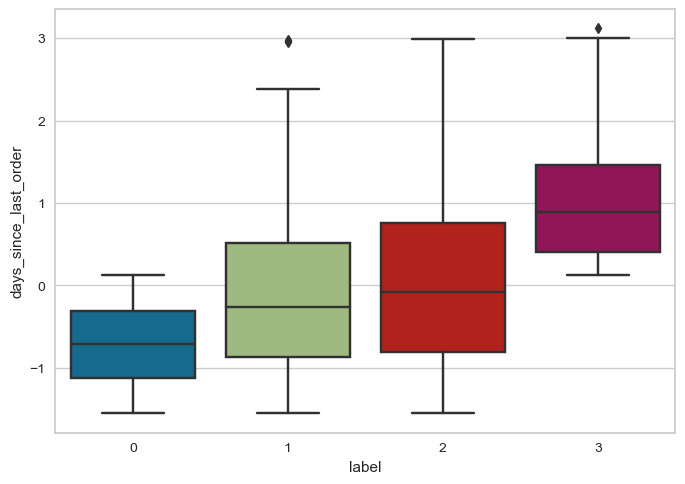

In [16]:
results_rfm = pd.DataFrame(X_rfm,columns = ['mean_payment_item','order_count','days_since_last_order'])
kmeans = KMeans(n_clusters=4, n_init=10).fit_predict(results_rfm)
results_rfm['label']=kmeans

for col in results_rfm.drop(columns=['label']).columns : 
    plt.figure()
    sns.boxplot(y=results_rfm[col],x=results_rfm['label'])

In [17]:
results_rfm['label'].value_counts()

0    50391
3    37182
1     2785
2     2380
Name: label, dtype: int64

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score

ari_list = list()
label = KMeans(n_clusters=4, n_init=10).fit_predict(X_rfm)

for i in range(20):
    label_new = KMeans(n_clusters=4, n_init=10).fit_predict(X_rfm)
    ari = adjusted_rand_score(label_new,label)
    ari_list.append(ari)
    label = label_new
    i = i+1

mean_ari = np.mean(ari_list)
print('Mean ARI = '+str(mean_ari))

Mean ARI = 0.999992583520813


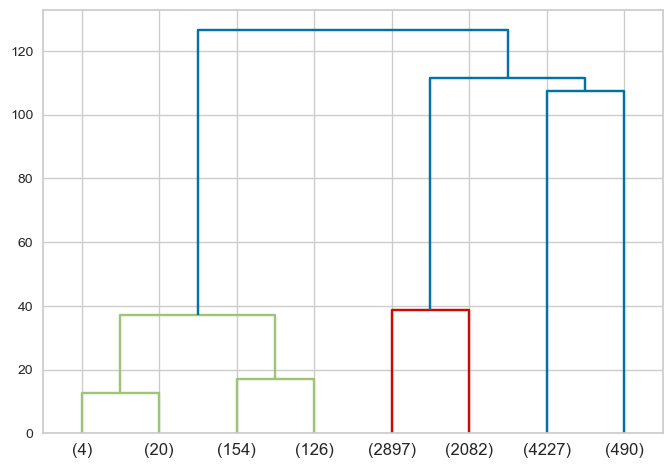

In [19]:
model = AgglomerativeClustering(compute_distances=True)
sample=pd.DataFrame(X_rfm, columns = ['mean_payment_item','order_count','days_since_last_order']).sample(10000)
model = model.fit(sample)
plot_dendrogram(model, truncate_mode="level", p=2)


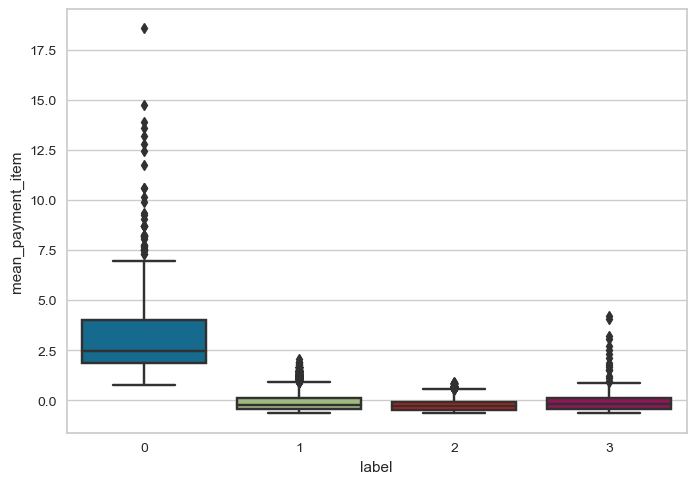

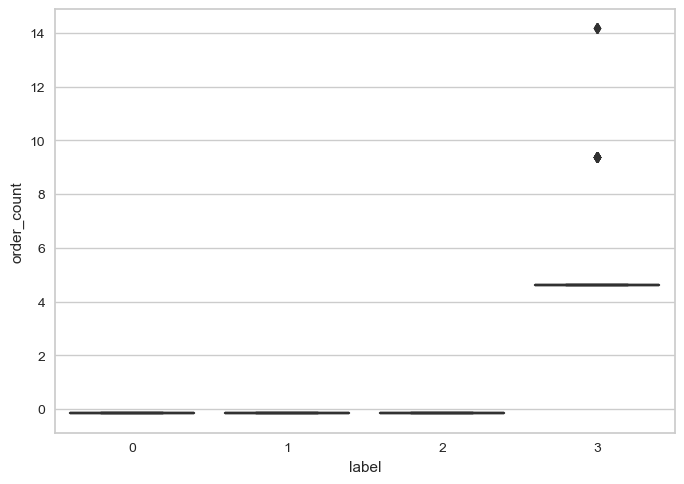

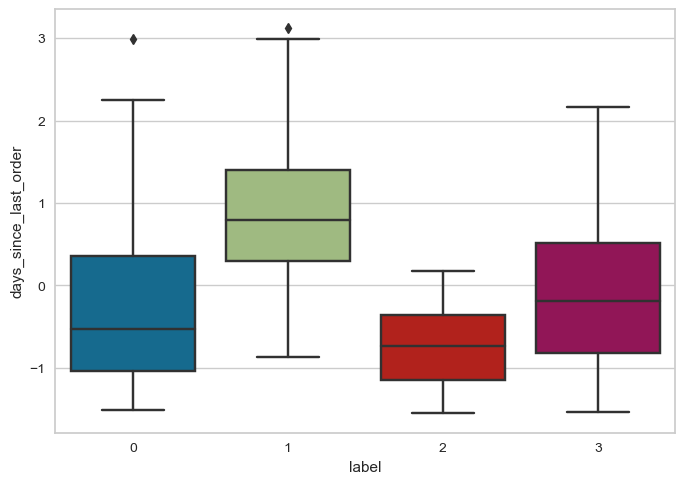

In [20]:
model = AgglomerativeClustering(n_clusters=4)
model = model.fit_predict(sample)

results_hierarchical_rfm = sample
results_hierarchical_rfm['label']=model

for col in results_hierarchical_rfm.drop(columns=['label']).columns : 
    plt.figure()
    sns.boxplot(y=results_hierarchical_rfm[col],x=results_hierarchical_rfm['label'])

In [21]:
results_hierarchical_rfm['label'].value_counts()

2    4979
1    4227
0     490
3     304
Name: label, dtype: int64

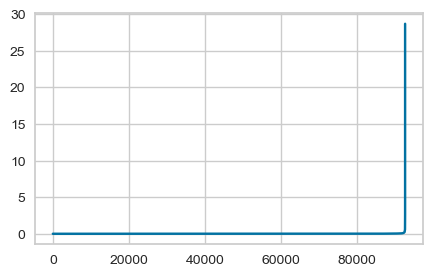

In [22]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_rfm) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_rfm) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [23]:
model = DBSCAN().fit(X_rfm)

labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_rfm, labels):.3f}")



Estimated number of clusters: 12
Estimated number of noise points: 82
Silhouette Coefficient: 0.472


# Modélisation avec variables RFM + Review 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92738 entries, 0 to 93339
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_freight           92738 non-null  float64
 1   order_count            92738 non-null  int64  
 2   mean_n_items           92738 non-null  float64
 3   mean_payment_item      92738 non-null  float64
 4   mean_review            92738 non-null  float64
 5   days_since_last_order  92738 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 5.0 MB


In [25]:
scaler = StandardScaler()

X_rfm_review= scaler.fit_transform(data[['mean_payment_item','order_count','days_since_last_order','mean_review']])
X_rfm_review

array([[-0.058798  , -0.16001233, -0.8279521 ,  0.66112802],
       [-0.57945009, -0.16001233, -0.80829199, -0.12007798],
       [-0.34445306, -0.16001233,  1.96378292, -0.90128398],
       ...,
       [-0.24642037, -0.16001233,  2.16693735,  0.66112802],
       [-0.12868733, -0.16001233, -0.77552515,  0.66112802],
       [-0.40078668, -0.16001233,  1.61645439,  0.66112802]])

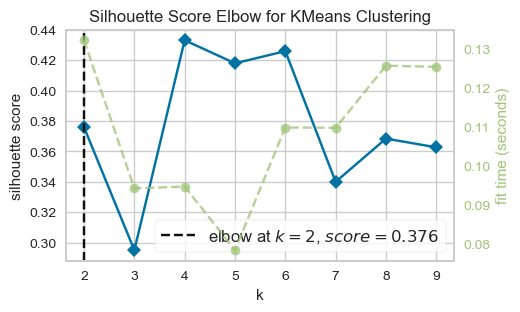

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10),metric = 'silhouette')

visualizer.fit(X_rfm_review)    
visualizer.poof() 

2 done with score 0.3759774041998952
3 done with score 0.4143191818031202
4 done with score 0.3935842395174346
5 done with score 0.4179757377773966
6 done with score 0.4260033985371097


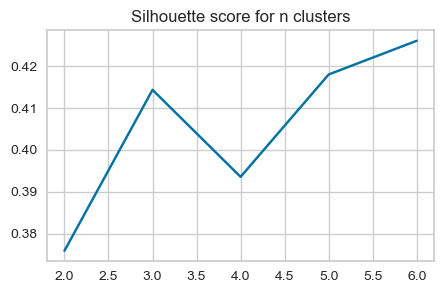

In [27]:
range_n_clusters = [2, 3, 4, 5, 6]

silhouette = list()

for n in range_n_clusters : 
    kmeans = KMeans(n_clusters=n, n_init=10).fit_predict(X_rfm_review)
    score = silhouette_score(X_rfm_review, kmeans)
    silhouette.append(score)
    print(str(n)+' done with score '+str(score))

plt.title('Silhouette score for n clusters')
plt.plot(range_n_clusters,silhouette)

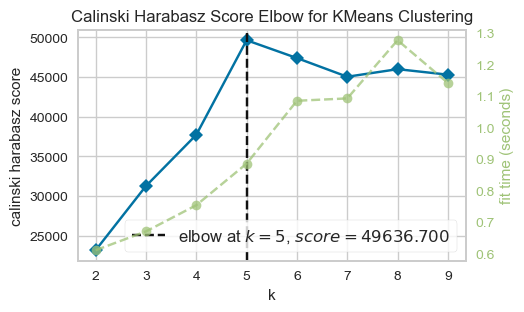

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10),metric = 'calinski_harabasz')

visualizer.fit(X_rfm_review)    # Fit the data to the visualizer
visualizer.poof()

1 done with inertia score 370952.00000000093
2 done with inertia score 294353.3356650104
3 done with inertia score 221520.94048587655
4 done with inertia score 167061.42293916448
5 done with inertia score 118097.79555437251
6 done with inertia score 105811.39506182855
7 done with inertia score 92299.01931766619
8 done with inertia score 84249.33784430107
9 done with inertia score 74918.66906765585


Text(0.5, 1.0, 'Inertia per n clusters')

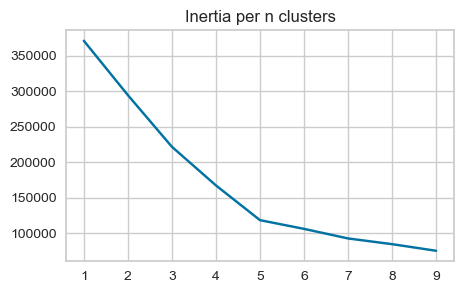

In [29]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # On entraine
    kmeans.fit(X_rfm_review)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)
    
    print(str(k)+' done with inertia score '+str(kmeans.inertia_))
    
plt.plot(range(1, 10),intertia_list)
plt.title('Inertia per n clusters')



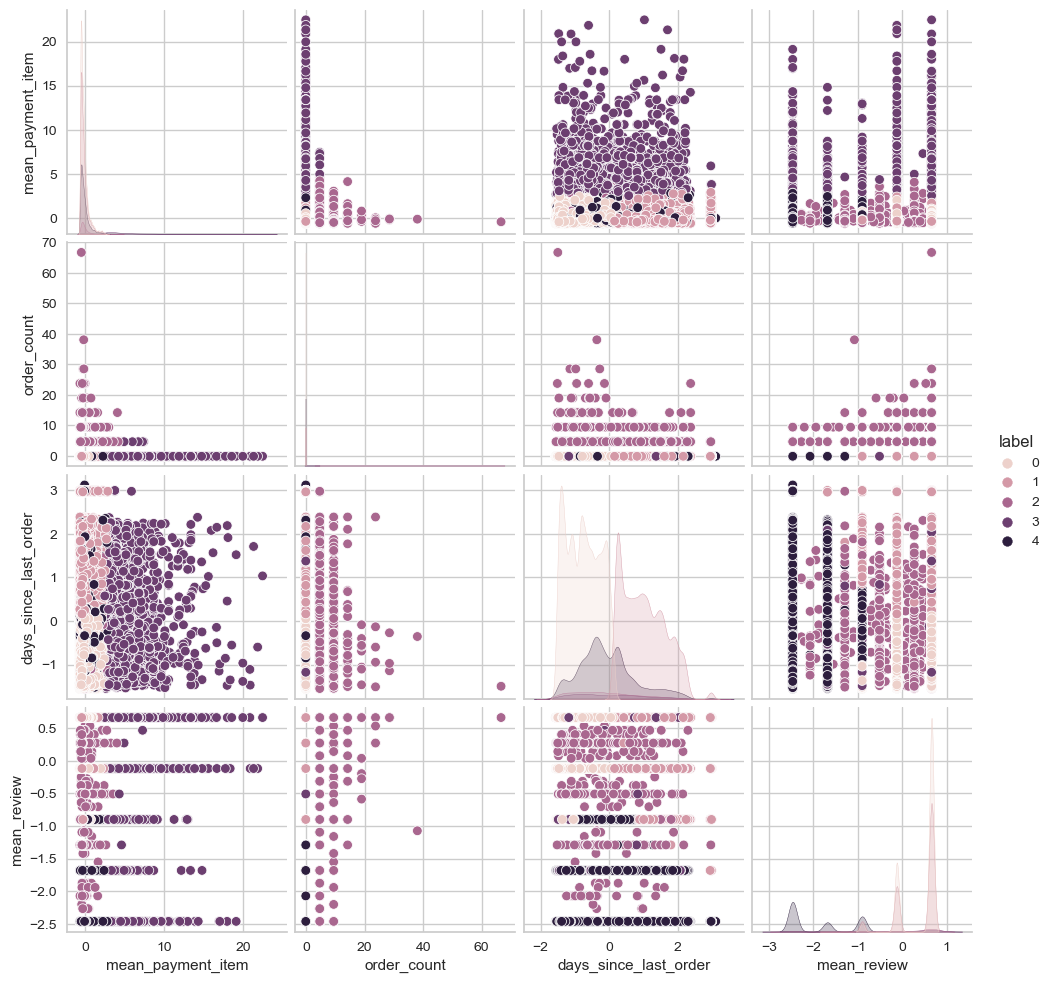

In [30]:
results_rfm_review = pd.DataFrame(X_rfm_review,columns = ['mean_payment_item','order_count','days_since_last_order','mean_review'])
kmeans = KMeans(n_clusters=5, n_init=10).fit_predict(X_rfm_review)
results_rfm_review['label']=kmeans
sns.pairplot(results_rfm_review,hue='label')

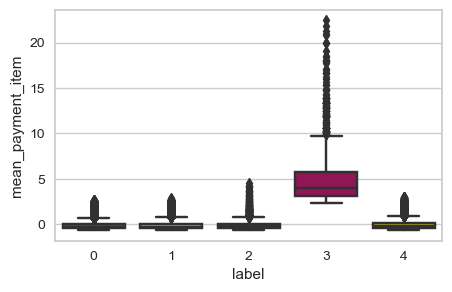

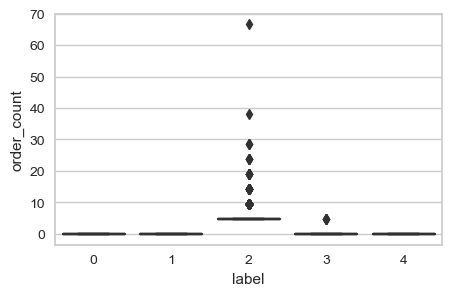

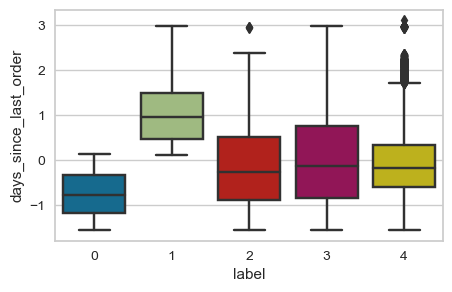

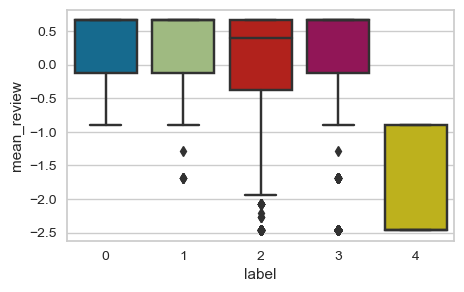

In [31]:
for col in results_rfm_review.drop(columns=['label']).columns : 
    plt.figure()
    sns.boxplot(y=results_rfm_review[col],x=results_rfm_review['label'])

In [32]:
results_rfm_review['label'].value_counts()

0    41013
1    31237
4    15639
2     2785
3     2064
Name: label, dtype: int64

In [33]:
from sklearn.metrics.cluster import adjusted_rand_score

ari_list = list()
label = KMeans(n_clusters=5, n_init=10).fit_predict(X_rfm_review)

for i in range(20):
    label_new = KMeans(n_clusters=5, n_init=10).fit_predict(X_rfm_review)
    ari = adjusted_rand_score(label_new,label)
    ari_list.append(ari)
    label = label_new
    i = i+1

mean_ari = np.mean(ari_list)
print('Mean ARI = '+str(mean_ari))

Mean ARI = 0.9991140675326949


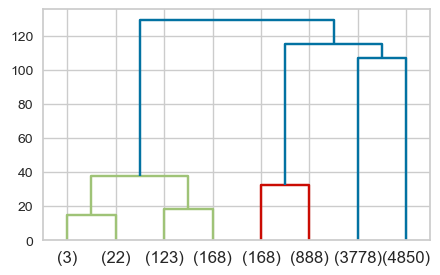

In [55]:
model = AgglomerativeClustering(compute_distances=True)
sample=pd.DataFrame(X_rfm_review, columns = ['mean_payment_item','order_count','days_since_last_order','mean_review']).sample(10000)
model = model.fit(sample)
plot_dendrogram(model, truncate_mode="level", p=2)


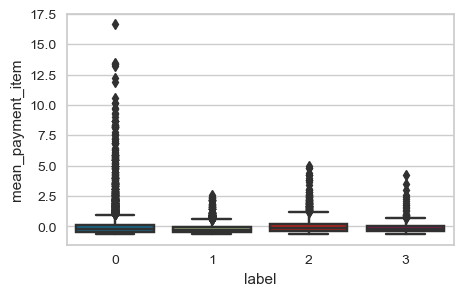

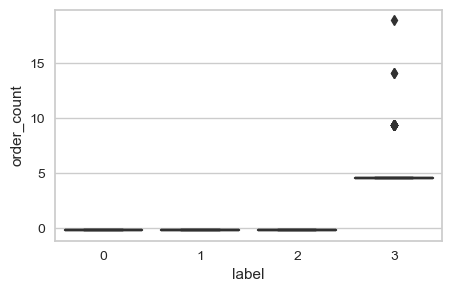

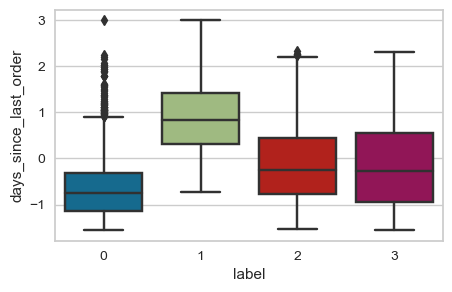

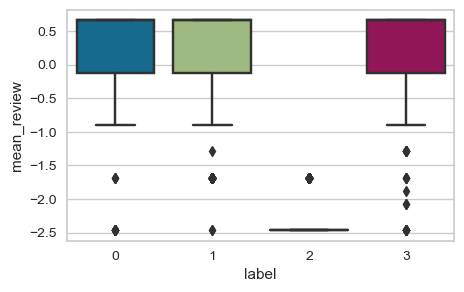

In [56]:
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(sample)

results_hierarchical_rfm_review = sample
results_hierarchical_rfm_review['label']=labels

for col in results_hierarchical_rfm_review.drop(columns=['label']).columns : 
    plt.figure()
    sns.boxplot(y=results_hierarchical_rfm_review[col],x=results_hierarchical_rfm_review['label'])

In [57]:
silhouette = silhouette_score(sample, labels)
print('silhouette score = '+str(score))

silhouette score = 0.3900105426861276


In [58]:
results_hierarchical_rfm_review['label'].value_counts()

0    4850
1    3778
2    1056
3     316
Name: label, dtype: int64

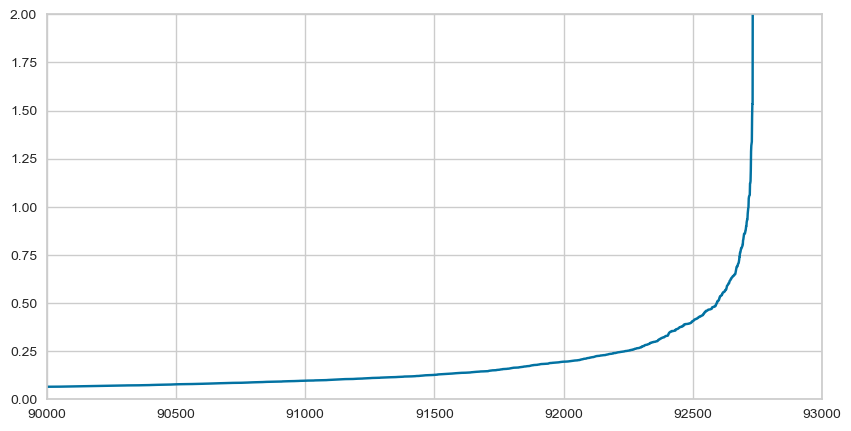

In [38]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=5) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_rfm_review) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_rfm_review) # finding the nearest neighbours

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (10,5) # setting the figure size
plt.plot(distances) # plotting the distances

ax = plt.gca()
ax.set_xlim([90000, 93000])
ax.set_ylim([0, 2])

plt.show() # showing the plot


In [39]:
for i in [5,6,7,8,9,10]:
    model = DBSCAN(eps=0.5, min_samples=i).fit(X_rfm_review)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print("Results with min samples = %d" % i)
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X_rfm_review, labels):.3f}")
    print('\n')

Results with min samples = 5
Estimated number of clusters: 15
Estimated number of noise points: 360
Silhouette Coefficient: 0.303


Results with min samples = 6
Estimated number of clusters: 15
Estimated number of noise points: 392
Silhouette Coefficient: 0.298


Results with min samples = 7
Estimated number of clusters: 11
Estimated number of noise points: 432
Silhouette Coefficient: 0.307


Results with min samples = 8
Estimated number of clusters: 15
Estimated number of noise points: 463
Silhouette Coefficient: 0.279


Results with min samples = 9
Estimated number of clusters: 15
Estimated number of noise points: 506
Silhouette Coefficient: 0.283


Results with min samples = 10
Estimated number of clusters: 13
Estimated number of noise points: 571
Silhouette Coefficient: 0.288




# Modélisation avec toutes les variables

In [40]:
scaler = StandardScaler()

X_all= scaler.fit_transform(data)
X_all

array([[-0.47908058, -0.16001233, -0.26557087, -0.058798  ,  0.66112802,
        -0.8279521 ],
       [-0.6296292 , -0.16001233, -0.26557087, -0.57945009, -0.12007798,
        -0.80829199],
       [-0.26725746, -0.16001233, -0.26557087, -0.34445306, -0.90128398,
         1.96378292],
       ...,
       [-0.05056484, -0.16001233, -0.26557087, -0.24642037,  0.66112802,
         2.16693735],
       [-0.20760612, -0.16001233, -0.26557087, -0.12868733,  0.66112802,
        -0.77552515],
       [-0.37479219, -0.16001233, -0.26557087, -0.40078668,  0.66112802,
         1.61645439]])

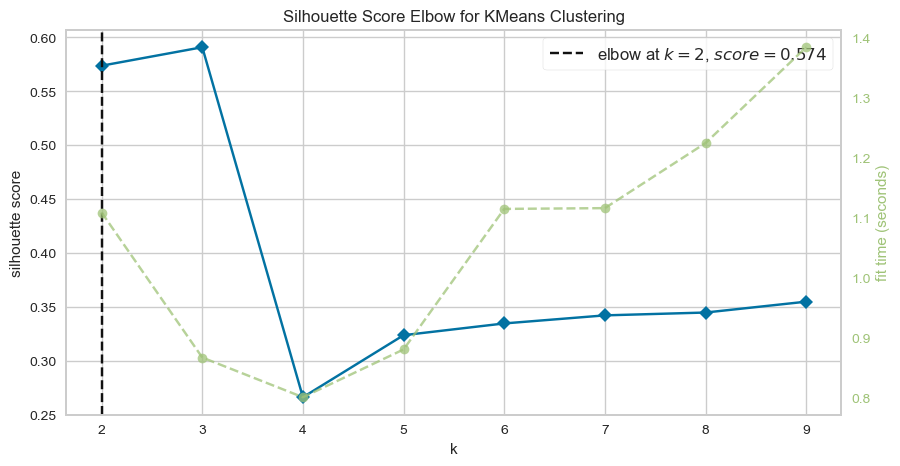

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [41]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10),metric = 'silhouette')

visualizer.fit(X_all)    
visualizer.poof() 

2 done with score 0.40533267168733866
3 done with score 0.4413196256487602
4 done with score 0.40390618234232795
5 done with score 0.39240766111940273
6 done with score 0.3900105426861276


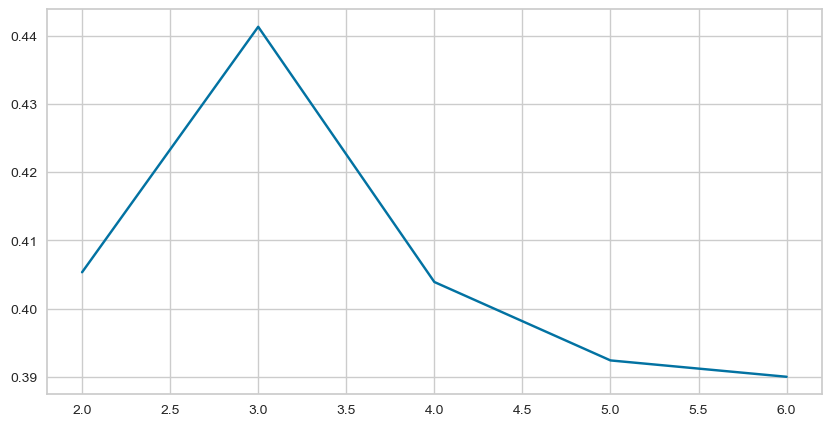

In [42]:
range_n_clusters = [2, 3, 4, 5, 6]

silhouette = list()

for n in range_n_clusters : 
    kmeans = KMeans(n_clusters=n,n_init=10).fit_predict(X_all)
    score = silhouette_score(X_rfm_review, kmeans)
    silhouette.append(score)
    print(str(n)+' done with score '+str(score))

plt.plot(range_n_clusters,silhouette)

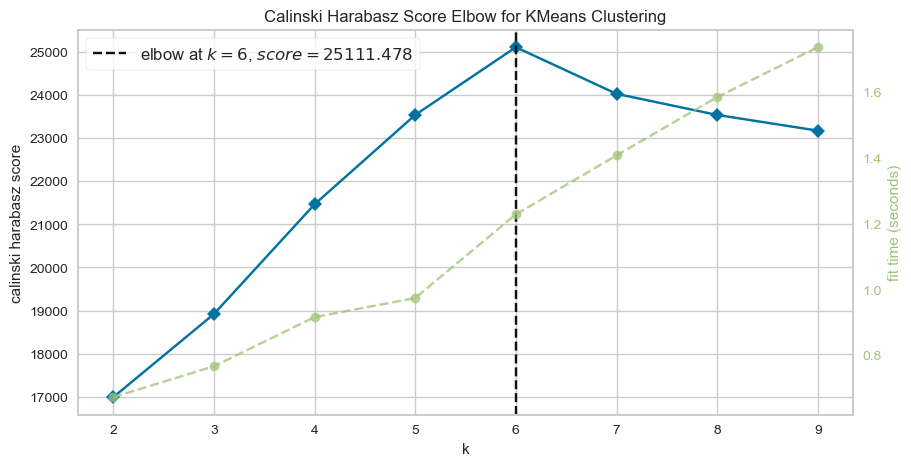

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [43]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,10),metric = 'calinski_harabasz')

visualizer.fit(X_all)    # Fit the data to the visualizer
visualizer.poof() 

In [44]:
results_all = pd.DataFrame(X_all,columns = data.columns)
kmeans = KMeans(n_clusters=5,n_init=10).fit_predict(X_all)
results_all['label']=kmeans


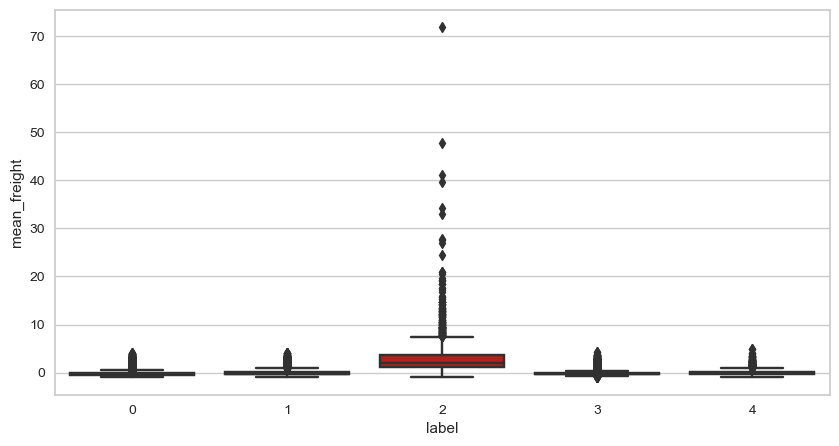

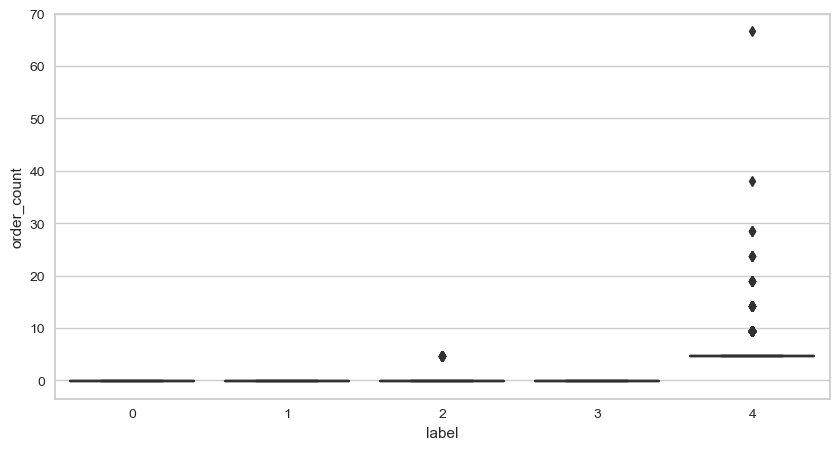

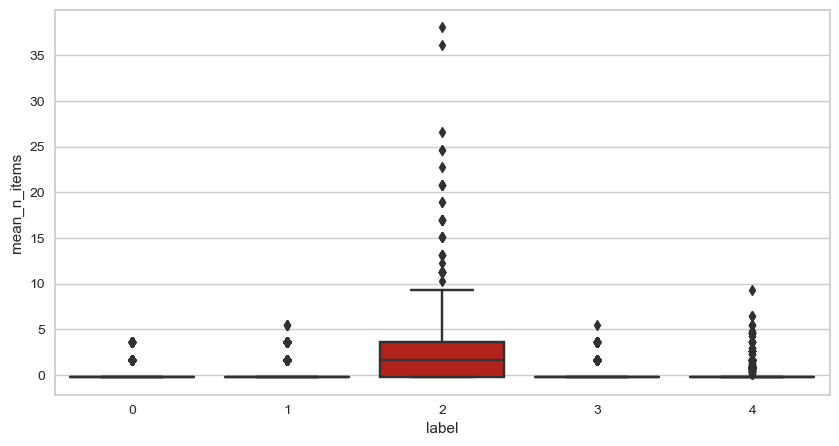

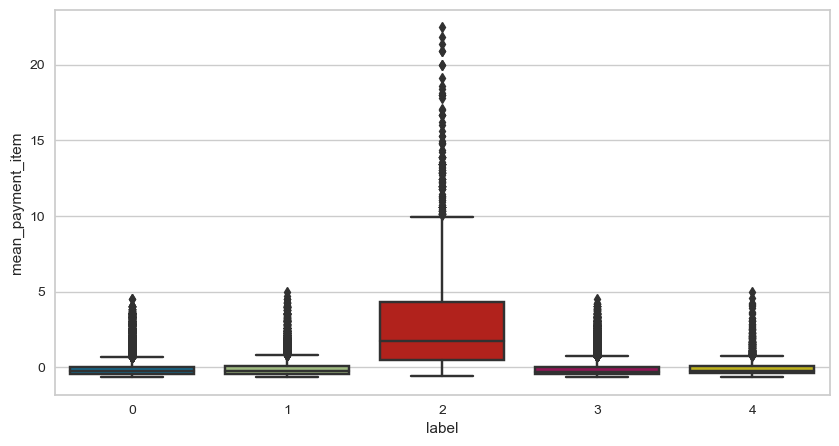

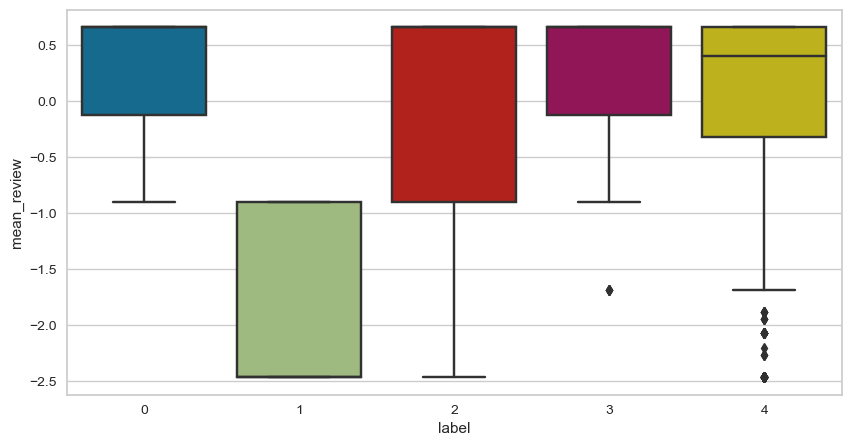

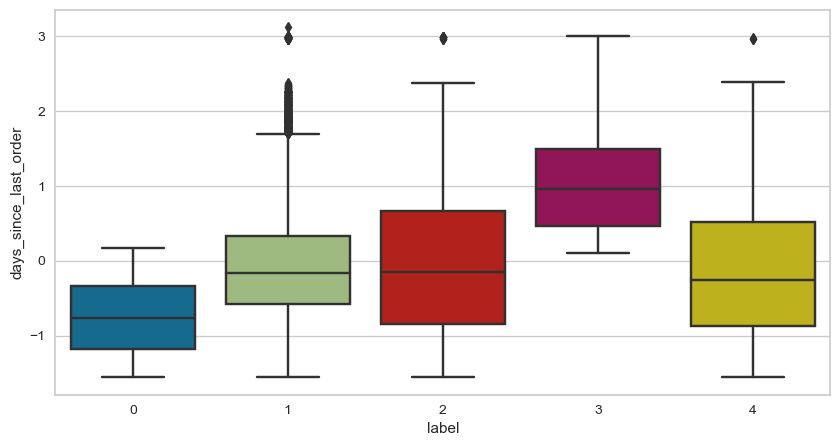

In [45]:
for col in results_all.drop(columns=['label']).columns : 
    plt.figure()
    sns.boxplot(y=results_all[col],x=results_all['label'])

In [46]:
ari_list = list()
label = KMeans(n_clusters=5, n_init=10).fit_predict(X_all)

for i in range(20):
    label_new = KMeans(n_clusters=5,n_init=10).fit_predict(X_all)
    ari = adjusted_rand_score(label_new,label)
    ari_list.append(ari)
    label = label_new
    i = i+1

mean_ari = np.mean(ari_list)
print('Mean ARI = '+str(mean_ari))

Mean ARI = 0.9990718995544944


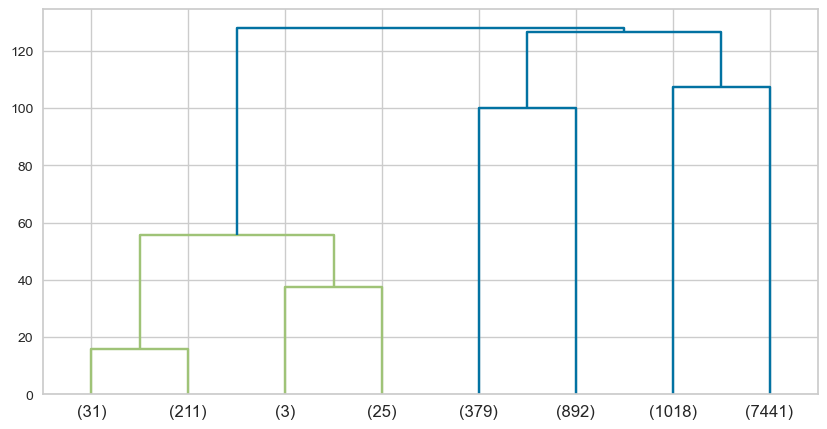

In [47]:
model = AgglomerativeClustering(compute_distances=True)
sample=pd.DataFrame(X_all, columns = data.columns).sample(10000)
model = model.fit(sample)
plot_dendrogram(model, truncate_mode="level", p=2)

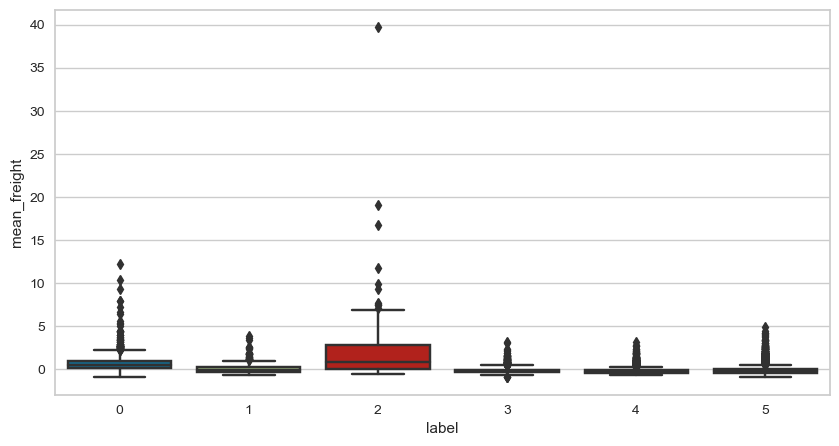

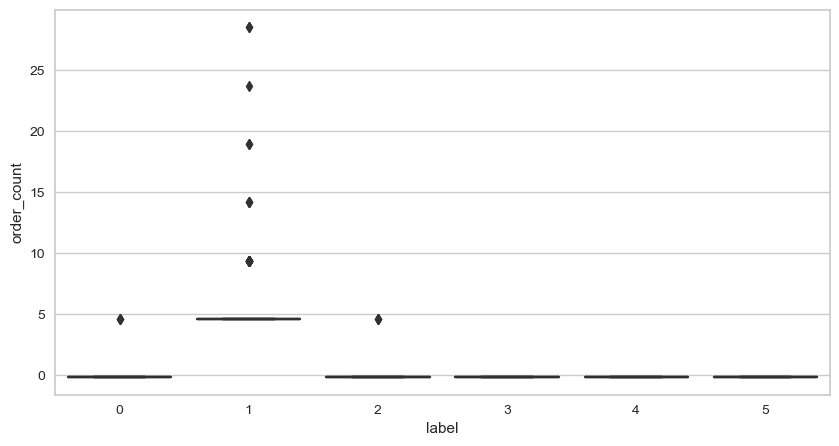

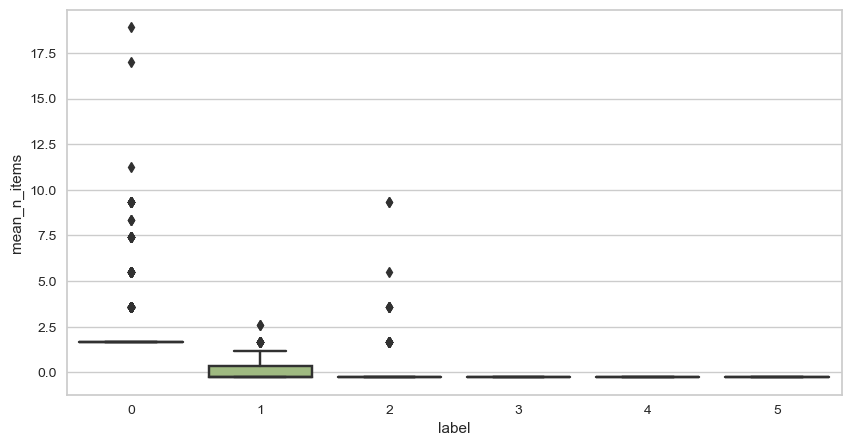

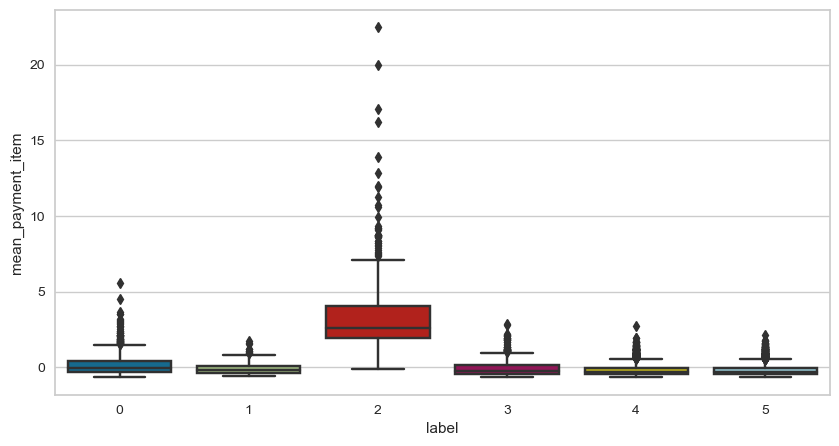

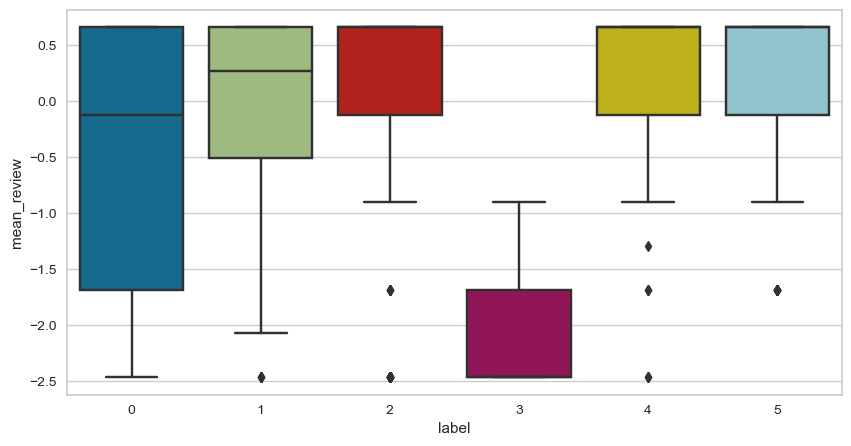

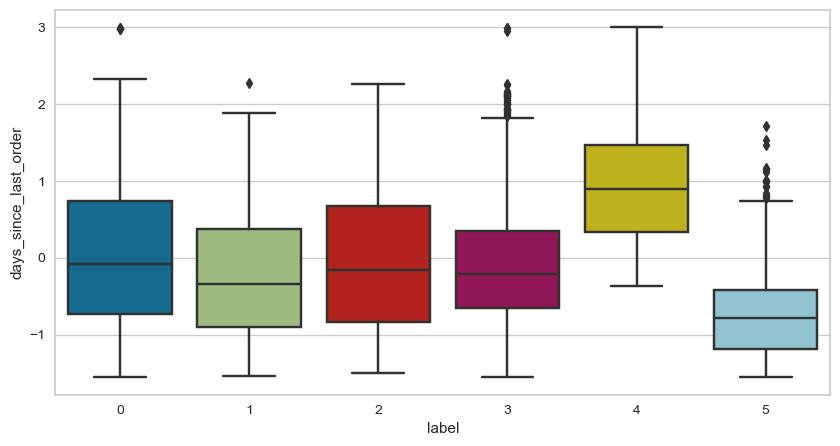

In [48]:
model = AgglomerativeClustering(n_clusters=6)
model = model.fit_predict(sample)

results_hierarchical_all = sample
results_hierarchical_all['label']=model

for col in results_hierarchical_all.drop(columns=['label']).columns : 
    plt.figure()
    sns.boxplot(y=results_hierarchical_all[col],x=results_hierarchical_all['label'])

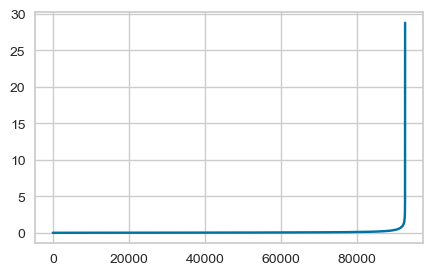

In [49]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=5) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_all) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_all) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [59]:
model = DBSCAN().fit(X_all)

labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_all, labels):.3f}")

Estimated number of clusters: 73
Estimated number of noise points: 3110
Silhouette Coefficient: 0.032
